<a href="https://colab.research.google.com/github/marnitam/python/blob/main/gasolinereport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import urllib.request
import json
import csv
from io import BytesIO

api_url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id=fee4930c-5be5-4a72-9222-43960051df21&limit=500'  
req = urllib.request.Request(api_url)
with urllib.request.urlopen(req) as response:
   page = response.read()
data = json.loads(page)
print(data["result"]["records"][0].keys())

dict_keys(['_id', 'Date', 'Pump Price/Prix à la pompe', 'Crude Cost/Coût du pétrole brut', "Federal Excise Tax/Taxe d'accise fédérale", 'Federal Carbon Tax/Taxe carbone fédérale', "Ontario Tax/Taxe de l'Ontario", 'GST/HST / TPS/TVH', 'Wholesale Margin/Marge de gros', 'Retail Margin/Marge de détail'])


Index(['Date', 'Pump Price', 'Crude Cost', 'Federal Excise Tax',
       'Federal Carbon Tax', 'Ontario Tax', 'GST', 'Wholesale Margin',
       'Retail Margin', 'Region'],
      dtype='object')


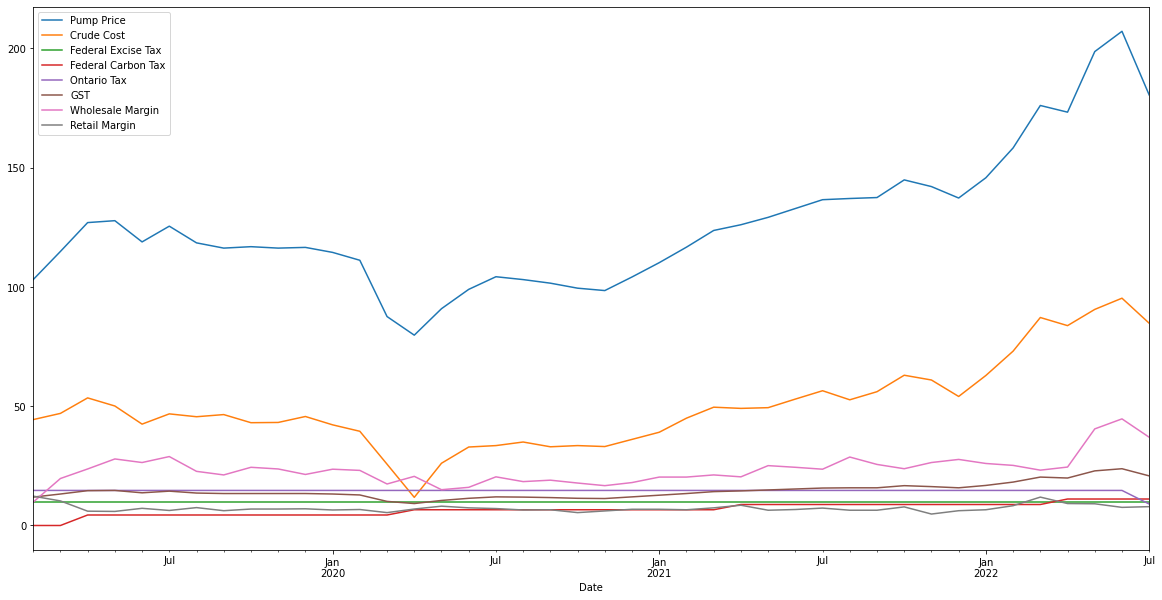

In [132]:
import pandas as pd
from IPython.display import display
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#df = pd.DataFrame.from_dict(data["result"]["records"])
csv_url = "https://ontario.ca/v1/files/fuel-prices/pumppricesall.csv"
df = pd.read_csv(csv_url,delimiter=",", encoding="latin1")
cols = list(df.columns)
df.columns = [x.split("/")[0].strip() for x in cols]
#print(df.columns)
df.Date = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S.%f')
#display(df)
to_df = df[(df["Region"] == "Toronto") & (df["Date"] > datetime(2019, 1, 1))]
to_df.set_index(['Date'],inplace=True)
lines = to_df.plot(figsize=(20,10))